## Pendahuluan
---
Nama  : Eldi Muhamad Sunartadirja  
Batch : RMT-040

Problem Statement:  
Buah Alpukat merupakan salah satu buah yang cukup populer di Indonesia, terutama ketika mendekati bulan suci Ramadhan. Jus Alpukat menjadi salah satu menu takjil yang diminati masyarakat. Selain rasanya yang enak, buah Alpukat juga memiliki beberapa manfaat, salah satunya buah Alpukat dapat membantu penderita Diabetes untuk mengatur gula darah. Meskipun mengandung karbohidrat, indeks glikemik pada buah Alpukat sangat rendah, sehingga tidak mempengaruhi gula darah. Sayangnya meskipun permintaan akan buah Alpukat cukup tinggi, banyak petani yang kesulitan menentukan harga jual dari buah Alpukat, tidak jarang petani menjual buah Alpukat tanpa mendapatkan untung. Program yang dibuat diharapkan dapat memberikan rekomendasi kepada petani mengenai harga jual dari buah Alpukat yang tepat.  

Objective:  
Membuat model yang dapat memprediksi harga jual buah alpukat.

---

## Import Libraries

In [320]:
# Import Libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, skew
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn import tree
import phik
import pickle

## Data Loading

In [180]:
df_set_1 = pd.read_csv('avocado.csv')
df_set_1

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Deskripsi mengenai kolom.

| Kolom | Deskripsi |
| --- | --- |
| Date | Tanggal pengambilan data |
| AveragePrice | Harga rata-rata perbuah alpukat |
| Total Volume | Penjualan Total (4046 + 4225 + 4770) |
| 4046 | Jumlah Alpukat terjual dengan kategori PLU 4046 (Buah alpukat dengan berat 3-5oz atau 85-141 gram) |
| 4225 | Jumlah Alpukat terjual dengan kategori PLU 4225 (Buah alpukat dengan berat 8-10oz atau 226-283 gram) |
| 4770 | Jumlah Alpukat terjual dengan kategori PLU 4770 (Buah alpukat dengan berat 10-15oz atau 283-425 gram) |
| Total Bags | Penjualan Total per Kantung (Small Bags + Large Bags + XLarge Bags) |
| Small Bags | Total penjualan alpukat dalam kantung kecil |
| Large Bags | Total penjualan alpukat dalam kantung besar |
| XLarge Bags | Total penjualan alpukat dalam kantung sangat besar |
| type | Jenis buah alpukat, organik atau konvensional |
| year | Tahun pengambilan data |
| region | Lokasi pengambilan data |

In [181]:
df_set_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


## EDA

In [ ]:
# Cek Missing Value
df_set_1.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Tidak ditemukan missing value pada dataset ini, sehingga tidak perlu dilakukan handle missing value.

In [ ]:
# Drop kolom 'Unnamed: 0'
df_set_1.drop(columns='Unnamed: 0',inplace=True)
df_set_1

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Kolom `Unnamed: 0` di drop karena berisi data yang serupa dengan index.

In [ ]:
# Konversi float menjadi integer
# Kolom float yang akan diubah menjadi integer
col = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
df_set_1[col] = df_set_1[col].astype(int)
df_set_1

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236,1036,54454,48,8696,8603,93,0,conventional,2015,Albany
1,2015-12-20,1.35,54876,674,44638,58,9505,9408,97,0,conventional,2015,Albany
2,2015-12-13,0.93,118220,794,109149,130,8145,8042,103,0,conventional,2015,Albany
3,2015-12-06,1.08,78992,1132,71976,72,5811,5677,133,0,conventional,2015,Albany
4,2015-11-29,1.28,51039,941,43838,75,6183,5986,197,0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074,2046,1529,0,13498,13066,431,0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888,1191,3431,0,9264,8940,324,0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766,1191,2452,727,9394,9351,42,0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205,1527,2981,727,10969,10919,50,0,organic,2018,WestTexNewMexico


Type data dari kolom `Total Volume`, `4046`, `4225`, `4770`, `Total Bags`, `Small Bags`, `Large Bags`, dan `Xlarge Bags` diubah dari float menjadi integer. Hal ini dilakukan karena tidak ada buah alpukat yang dijual dalam bentuk pecahan. Kolom `AveragePrice` tidak diubah menjadi integer karena kolom tersebut berisi nilai harga, harga jual memang umum memiliki nilai dibelakang koma, seperti contohnya mata uang dollar, nilai dibelakang koma menggambarkan nilai uang cent.

In [ ]:
# Konversi kolom Date menjadi type datetime
df_set_1['Date'] = pd.to_datetime(df_set_1['Date'], format='%Y-%m-%d')
df_set_1

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236,1036,54454,48,8696,8603,93,0,conventional,2015,Albany
1,2015-12-20,1.35,54876,674,44638,58,9505,9408,97,0,conventional,2015,Albany
2,2015-12-13,0.93,118220,794,109149,130,8145,8042,103,0,conventional,2015,Albany
3,2015-12-06,1.08,78992,1132,71976,72,5811,5677,133,0,conventional,2015,Albany
4,2015-11-29,1.28,51039,941,43838,75,6183,5986,197,0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074,2046,1529,0,13498,13066,431,0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888,1191,3431,0,9264,8940,324,0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766,1191,2452,727,9394,9351,42,0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205,1527,2981,727,10969,10919,50,0,organic,2018,WestTexNewMexico


Kolom `Date` diubah type datanya dari object menjadi datetime.

In [ ]:
# Membuat copy dataset
data_1 = df_set_1.copy()
data_1

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236,1036,54454,48,8696,8603,93,0,conventional,2015,Albany
1,2015-12-20,1.35,54876,674,44638,58,9505,9408,97,0,conventional,2015,Albany
2,2015-12-13,0.93,118220,794,109149,130,8145,8042,103,0,conventional,2015,Albany
3,2015-12-06,1.08,78992,1132,71976,72,5811,5677,133,0,conventional,2015,Albany
4,2015-11-29,1.28,51039,941,43838,75,6183,5986,197,0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074,2046,1529,0,13498,13066,431,0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888,1191,3431,0,9264,8940,324,0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766,1191,2452,727,9394,9351,42,0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205,1527,2981,727,10969,10919,50,0,organic,2018,WestTexNewMexico


Ditemukan ketidak sesuaian nilai pada kolom `Total Volume`, maka akan dilakukan penghitungan ulang dan hasilnya akan ditampilkan pada kolom baru.

In [ ]:
# 'total_sales' didapat dari hasil pemjumlahan kolom '4046', '4225' dan kolom '4770'
data_1['total_sales'] = data_1['4046'] + data_1['4225'] + data_1['4770']
data_1

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,total_sales
0,2015-12-27,1.33,64236,1036,54454,48,8696,8603,93,0,conventional,2015,Albany,55538
1,2015-12-20,1.35,54876,674,44638,58,9505,9408,97,0,conventional,2015,Albany,45370
2,2015-12-13,0.93,118220,794,109149,130,8145,8042,103,0,conventional,2015,Albany,110073
3,2015-12-06,1.08,78992,1132,71976,72,5811,5677,133,0,conventional,2015,Albany,73180
4,2015-11-29,1.28,51039,941,43838,75,6183,5986,197,0,conventional,2015,Albany,44854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074,2046,1529,0,13498,13066,431,0,organic,2018,WestTexNewMexico,3575
18245,2018-01-28,1.71,13888,1191,3431,0,9264,8940,324,0,organic,2018,WestTexNewMexico,4622
18246,2018-01-21,1.87,13766,1191,2452,727,9394,9351,42,0,organic,2018,WestTexNewMexico,4370
18247,2018-01-14,1.93,16205,1527,2981,727,10969,10919,50,0,organic,2018,WestTexNewMexico,5235


Dibuat kolom baru dengan nama kolom `total_sales`, kolom ini berisi penjumlahan dari kolom `4046`, `4225` dan kolom `4770`.

In [ ]:
# Drop kolom 'Total Volume'
data_1.drop(columns='Total Volume',inplace=True)
data_1

,Date,AveragePrice,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,total_sales
0,2015-12-27,1.33,1036,54454,48,8696,8603,93,0,conventional,2015,Albany,55538
1,2015-12-20,1.35,674,44638,58,9505,9408,97,0,conventional,2015,Albany,45370
2,2015-12-13,0.93,794,109149,130,8145,8042,103,0,conventional,2015,Albany,110073
3,2015-12-06,1.08,1132,71976,72,5811,5677,133,0,conventional,2015,Albany,73180
4,2015-11-29,1.28,941,43838,75,6183,5986,197,0,conventional,2015,Albany,44854
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,2046,1529,0,13498,13066,431,0,organic,2018,WestTexNewMexico,3575
18245,2018-01-28,1.71,1191,3431,0,9264,8940,324,0,organic,2018,WestTexNewMexico,4622
18246,2018-01-21,1.87,1191,2452,727,9394,9351,42,0,organic,2018,WestTexNewMexico,4370
18247,2018-01-14,1.93,1527,2981,727,10969,10919,50,0,organic,2018,WestTexNewMexico,5235


Selanjutnya kolom `Total Volume` di drop.

In [189]:
# Function untuk membuat Histogram dan Boxplot
def hist_box(*variables):
    # Histogram + KDE
    plt.figure(figsize=(20, 5))
    for i, column in enumerate(variables):
        plt.subplot(1, len(variables), i + 1)
        sns.histplot(data_1[column], kde=True, bins=20, color="skyblue")
        plt.title(f"Histogram & KDE: {column}")
    plt.tight_layout()
    plt.show()

    # Boxplot
    plt.figure(figsize=(20, 5))
    sns.boxplot(data=data_1[list(variables)], palette="pastel")
    plt.title("Boxplot of Selected Features")
    plt.show()

In [190]:
data_1.columns

Index(['Date', 'AveragePrice', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'total_sales'],
      dtype='object')

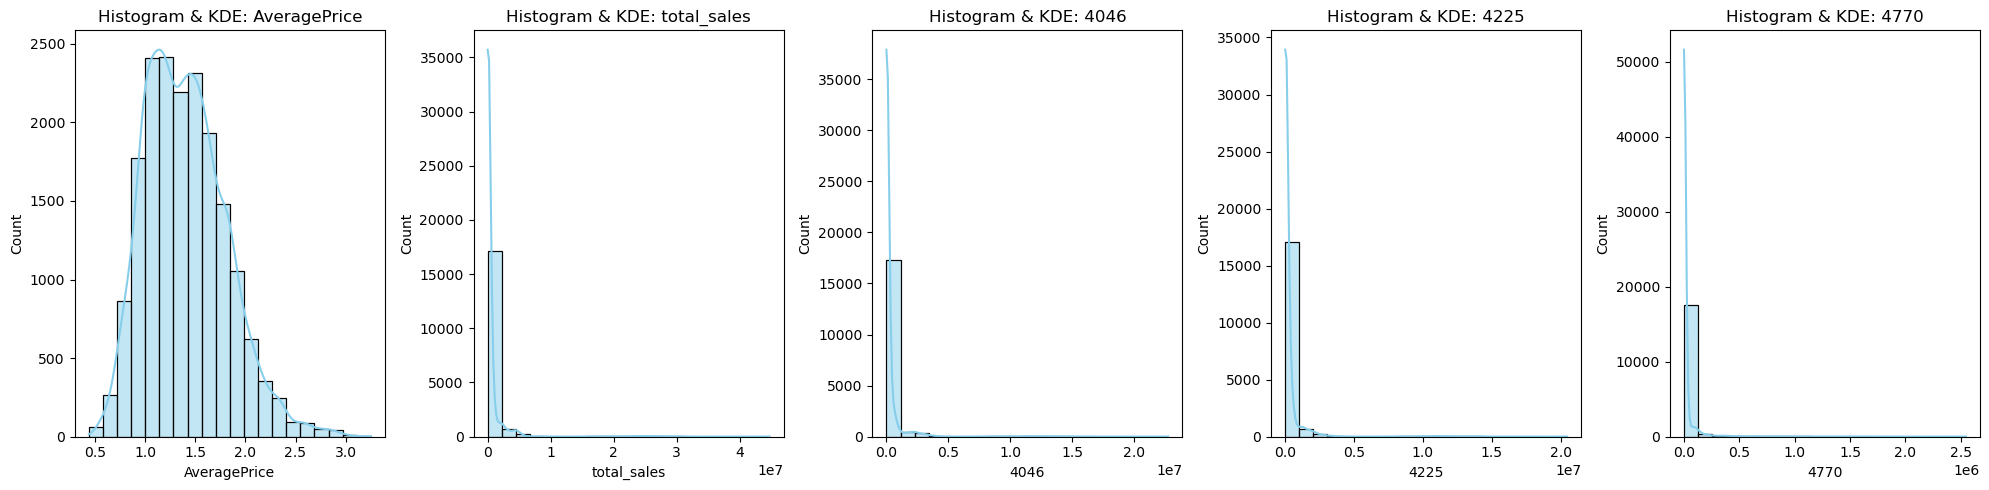

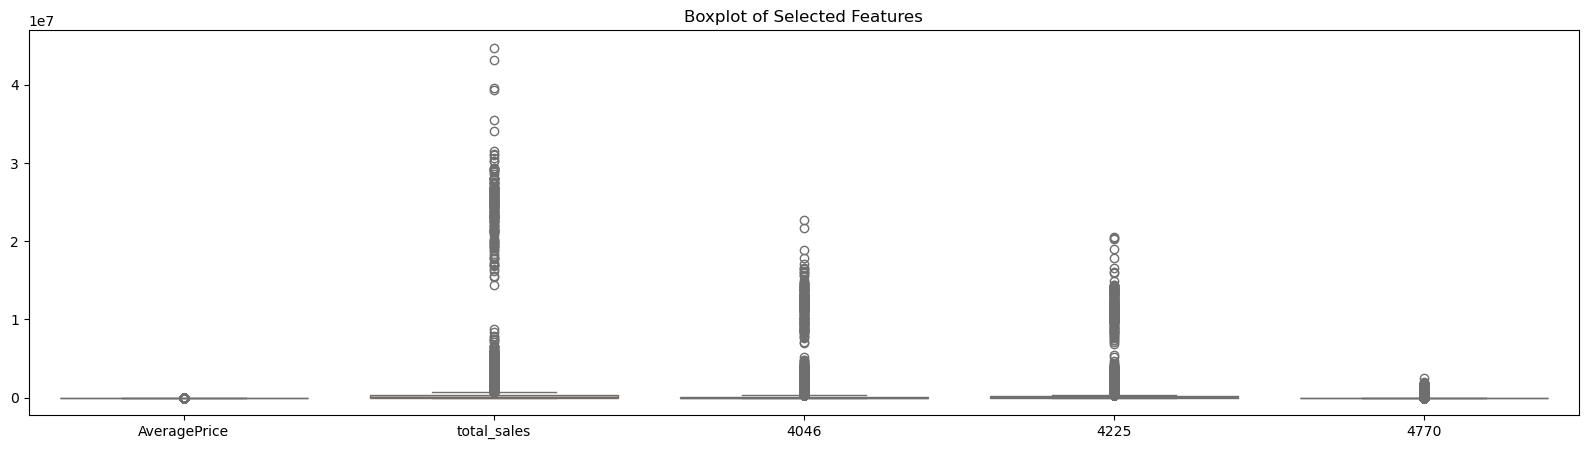

In [ ]:
# Histogram dan Boxplot untuk 'AveragePrice', 'total_sales', '4046', '4225', dan '4770'
hist_box('AveragePrice', 'total_sales', '4046', '4225', '4770')

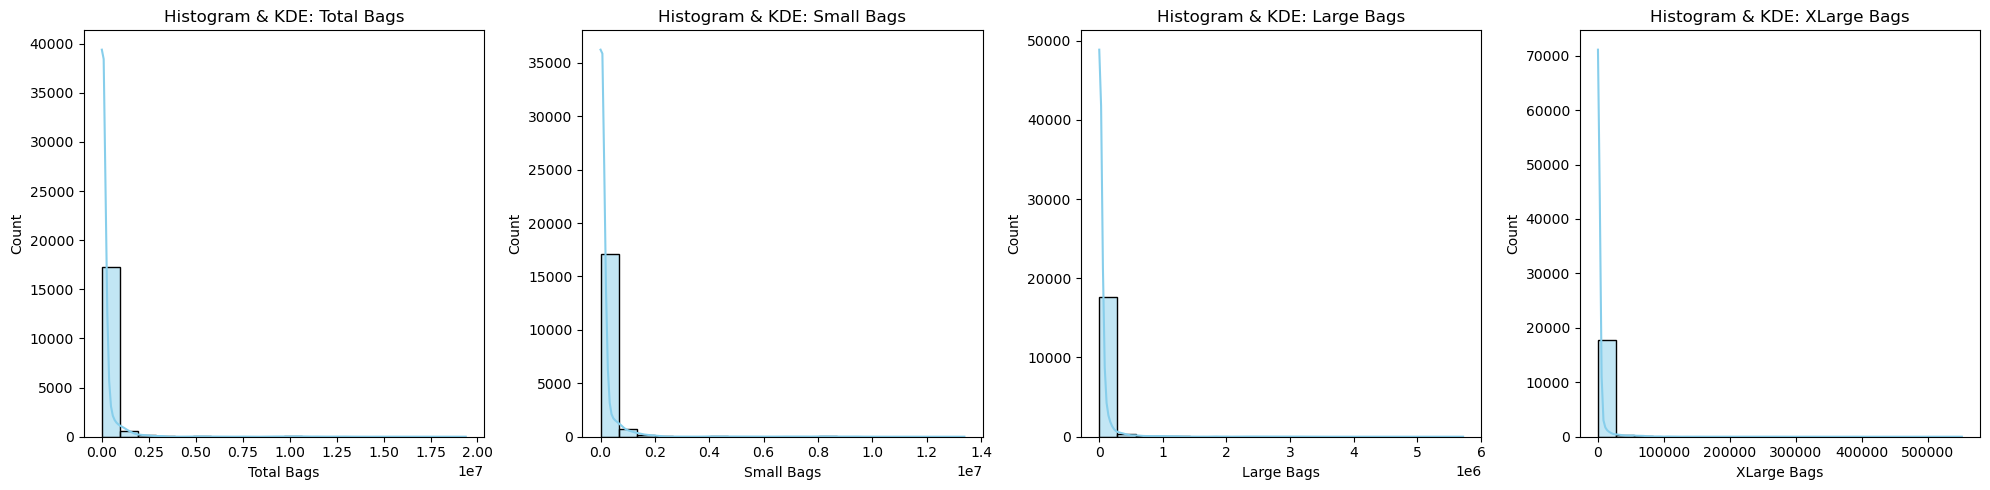

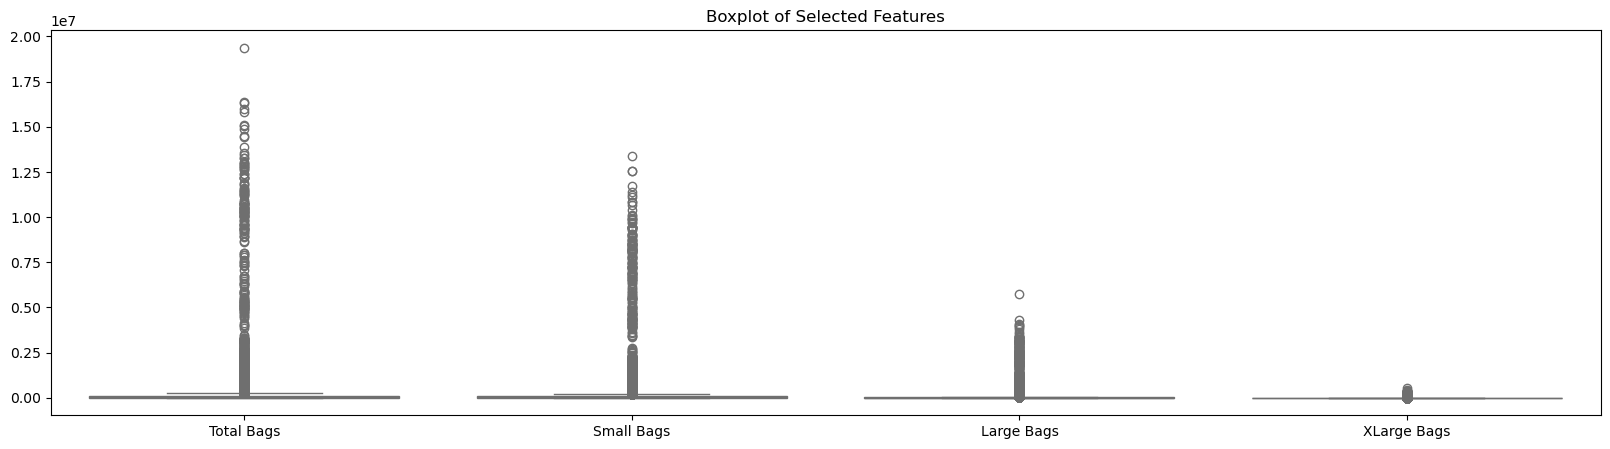

In [ ]:
# Histogram dan Boxplot untuk 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'
hist_box('Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags')

Dari grafik, semua data dalam kolom bersifat skewed. Ditemukan juga outlier pada kolom, hanya saja tidak akan dilakukan handling outlier, karena outlier ini bersifat normal pada dataset seperti ini.

In [ ]:
# Numerical columns
num_col = ['AveragePrice', '4046', '4225', '4770','Total Bags',
           'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'total_sales']
# Menghitung skewness for each numerical column
skewness_values = data_1[num_col].apply(skew)

# Print skewness values
print(skewness_values)

AveragePrice     0.580255
4046             8.647509
4225             8.941731
4770            10.158566
Total Bags       9.755270
Small Bags       9.539876
Large Bags       9.795650
XLarge Bags     13.138742
year             0.215321
total_sales      9.012300
dtype: float64


Uji Skewness menunjukan semua kolom bersifat skewed.

In [319]:
# Numerical columns
numerical_cols = ['AveragePrice', '4046', '4225', '4770','Total Bags',
                  'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'total_sales']

# Shapiro-Wilk test
shapiro_results = {}
for col in numerical_cols:
    stat, p_value = shapiro(data_1[col])
    shapiro_results[col] = {'Statistic': stat, 'p-value': p_value}

# Mengubah hasil menjadi DataFrame
shapiro_df = pd.DataFrame(shapiro_results).T
print(shapiro_df)

              Statistic        p-value
AveragePrice   0.978608   2.807972e-45
4046           0.220680  5.915150e-126
4225           0.224257  7.973075e-126
4770           0.202887  1.363744e-126
Total Bags     0.215073  3.713608e-126
Small Bags     0.218894  5.098521e-126
Large Bags     0.206094  1.772809e-126
XLarge Bags    0.159553  4.305968e-128
year           0.855838   6.114027e-83
total_sales    0.219842  5.516545e-126


Hasil dari uji Shapiro-Wilk menunjukan semua kolom memiliki nilai p-value jauh dibawah 0,05. Hal ini menandakan bahwa semua kolom numerical pada dataset ini bersifat tidak normal.

In [193]:
data_1.columns

Index(['Date', 'AveragePrice', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'total_sales'],
      dtype='object')

In [194]:
# Create function to correlate variables with default
def compute_phik_correlation(dataframe,columns,target):
    subset = dataframe[columns]
    correlation_matrix = subset.phik_matrix()
    return correlation_matrix[target]

# Define the list of columns for each subset
columns = ['Date', 'AveragePrice', 'total_sales', '4046', '4225', '4770',
           'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region']
target = ['AveragePrice']

# Compute Phi-K correlation for each set of columns and print
correlation = compute_phik_correlation(data_1, columns, target)

# Print result
print(correlation)

interval columns not set, guessing: ['AveragePrice', 'total_sales', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']
              AveragePrice
Date              0.436296
AveragePrice      1.000000
total_sales       0.167575
4046              0.269086
4225              0.143198
4770              0.109001
Total Bags        0.182769
Small Bags        0.202613
Large Bags        0.108452
XLarge Bags       0.084455
type              0.803483
year              0.238956
region            0.560240


Dari hasil phik correlation ditemukan bahwa `total_sales`, `4046`, `4225`, `4770`, `Total Bags`, `Small Bags`, `Large Bags`, `XLarge Bags` dan `year` memiliki korelasi positif yang lemah dengan `AveragePrice`. Sedangkan `Date`, dan `region` memiliki korelasi positif yang cukup kuat dengan `AveragePrice`. Selanjutnya, `type` memiliki korelasi yang kuat dengan `AveragePrice`.

## Feature Engineering

Dari hasil phik correlation dipilih fitur `total_sales` dan `type`. `AveragePrice` akan dijadikan sebagai target.

Fitur `total_sales` dipilih karena dianggap sudah dapat merepresentasikan fitur `4046`, `4225`, `4770`, `Total Bags`, `Small Bags`, `Large Bags`, dan `XLarge Bags`. Fitur `type` dipilih karena memiliki nilai korelasi yang kuat, dan juga terdapat asumsi bahwa buah alpukat organik memiliki harga yang lebih tinggi jika dibandingkan dengan alpukat konvensional. Fitur `region` meski pun memiliki nilai korelasi positif yang cukup kuat, fitur ini tidak dipilih karena kurang menggambarkan lokasi di Indonesia. Fitur `Date` dan `year` tidak dipilih karena tidak akan memperhitungkan dampak dari event yang terjadi pada waktu tertentu.

In [ ]:
# Memilih feature
data_1_feature = data_1.loc[:, ['total_sales', 'type', 'AveragePrice']].copy()
data_1_feature

,total_sales,type,AveragePrice
0,55538,conventional,1.33
1,45370,conventional,1.35
2,110073,conventional,0.93
3,73180,conventional,1.08
4,44854,conventional,1.28
...,...,...,...
18244,3575,organic,1.63
18245,4622,organic,1.71
18246,4370,organic,1.87
18247,5235,organic,1.93


In [198]:
# Split X dan y
X = data_1_feature.drop(columns=['AveragePrice'])
y = data_1_feature.AveragePrice

print(X.head())
print(y.head())

   total_sales          type
0        55538  conventional
1        45370  conventional
2       110073  conventional
3        73180  conventional
4        44854  conventional
0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64


In [199]:
# Split Train Test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=141)
print(f'Train Size: {X_train.shape}')
print(f'Test Size: {X_test.shape}')
X_train.head(5)

Train Size: (14599, 2)
Test Size: (3650, 2)


,total_sales,type
5794,52448,conventional
18012,1064,organic
11951,252,organic
6515,205439,conventional
11162,2742,organic


Selanjutnya dilakukan Feature Encoding pada fitur `type` menggunakan pipeline.

In [ ]:
# Membuat numerical columns dan categorical columns
num_col = ['total_sales']
cat_col = ['type']

In [ ]:
# Menentukan scaled dan encoder untuk knn
scaler_knn = MinMaxScaler()
ordinal = OrdinalEncoder()

preprocess_knn = ColumnTransformer(
    transformers = [
        ('num',scaler_knn,num_col),
        ('cat',ordinal,cat_col)],
    remainder='passthrough') # untuk categorical yg sdh di encode

Dipilih `MinMaxScaler` karena model KNN bekerja lebih optimal menggunakan scaler ini.

In [ ]:
# Menentukan scaled dan encoder untuk svr
scaler_svr = StandardScaler()
ordinal = OrdinalEncoder()

preprocess_svr = ColumnTransformer(
    transformers = [
        ('num',scaler_svr,num_col),
        ('cat',ordinal,cat_col)],
    remainder='passthrough') # untuk categorical yg sdh di encode

Dipilih `StandardScaler` karena model SVR bekerja lebih optimal menggunakan scaler ini.

In [ ]:
# Menentukan encoder untuk decisiontreeregressor, randomforestregressor dan gradientboosting resgressor
ordinal = OrdinalEncoder()

preprocess_tree = ColumnTransformer(
    transformers = [
        ('cat',ordinal,cat_col)],
    remainder='passthrough') # untuk categorical yg sdh di encode

Model Decision Tree, Random Forest, dan Boosting tidan dilakukan scaling, karena model-model ini sudah dapat bekerja secara optimal tanpa perlu dilakukan scaling.

## Model Definition

### KNeighborsRegressor

In [225]:
knn = KNeighborsRegressor(n_neighbors=3)

In [226]:
#Making pipeline for LogReg
pipe_knn = Pipeline([
('preprocess', preprocess_knn),
('classifier', knn)
])

### SVR

In [238]:
svr = SVR(kernel='linear', C=0.1, epsilon=0.1, max_iter=5000)

In [239]:
pipe_svr = Pipeline([
    ('preprocess', preprocess_svr),
    ('classifier', svr)
])

### DecisionTreeRegressor

In [229]:
model_dt = DecisionTreeRegressor(max_depth=4, random_state=141)

In [230]:
pipe_dt = Pipeline([
    ('preprocess', preprocess_tree),
    ('classifier', model_dt)
])

### RandomForestRegressor

In [231]:
rnd_reg = RandomForestRegressor(n_estimators=10,max_depth=4,random_state=141)

In [232]:
pipe_rf = Pipeline([
    ('preprocess', preprocess_tree),
    ('classifier', rnd_reg)
])

### GradientBoostingRegressor

In [233]:
grad_reg = GradientBoostingRegressor(n_estimators=10,max_depth=4,random_state=141)

In [234]:
pipe_grad = Pipeline([
    ('preprocess', preprocess_tree),
    ('classifier', grad_reg)
])

## Model Training

### KNeighborsRegressor

In [235]:
# Training using KNeighborsRegressor
pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['total_sales']),
                                                 ('cat', OrdinalEncoder(),
                                                  ['type'])])),
                ('classifier', KNeighborsRegressor(n_neighbors=3))])

### SVR

In [ ]:
# Training using SVR
pipe_svr.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['total_sales']),
                                                 ('cat', OrdinalEncoder(),
                                                  ['type'])])),
                ('classifier', SVR(C=0.1, kernel='linear', max_iter=5000))])

### DecisionTreeRegressor

In [ ]:
# Training using DecisionTreeRegressor
pipe_dt.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OrdinalEncoder(),
                                                  ['type'])])),
                ('classifier',
                 DecisionTreeRegressor(max_depth=4, random_state=141))])

### RandomForestRegressor

In [ ]:
# Training using RandomForestRegressor
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OrdinalEncoder(),
                                                  ['type'])])),
                ('classifier',
                 RandomForestRegressor(max_depth=4, n_estimators=10,
                                       random_state=141))])

### GradientBoostingRegressor

In [ ]:
# Training using GradientBoostingRegressor
pipe_grad.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OrdinalEncoder(),
                                                  ['type'])])),
                ('classifier',
                 GradientBoostingRegressor(max_depth=4, n_estimators=10,
                                           random_state=141))])

## Model Evaluation

### KNeighborsRegressor

In [245]:
# Model Prediction
y_pred_train_knn = pipe_knn.predict(X_train)
y_pred_test_knn = pipe_knn.predict(X_test)

In [322]:
# Evaluate the KNeighborsRegressor model
print("KNeighborsRegressor Model Evaluation - Train Set")
print(f"R2 Score: {r2_score(y_train, y_pred_train_knn)}")

print("KNeighborsRegressor Model Evaluation - Test Set")
print(f"R2 Score: {r2_score(y_test, y_pred_test_knn)}")

KNeighborsRegressor Model Evaluation - Train Set
R2 Score: 0.6152180994474995
KNeighborsRegressor Model Evaluation - Test Set
R2 Score: 0.20694711007701216


### SVR

In [248]:
# Model Prediction
y_pred_train_svr = pipe_svr.predict(X_train)
y_pred_test_svr = pipe_svr.predict(X_test)

In [323]:
# Evaluate the SVR model
print("SVR Model Evaluation - Train Set")
print(f"R2 Score: {r2_score(y_train, y_pred_train_svr)}")

print("SVR Model Evaluation - Test Set")
print(f"R2 Score: {r2_score(y_test, y_pred_test_svr)}")

SVR Model Evaluation - Train Set
R2 Score: -0.06289642479219504
SVR Model Evaluation - Test Set
R2 Score: -0.05053151270997702


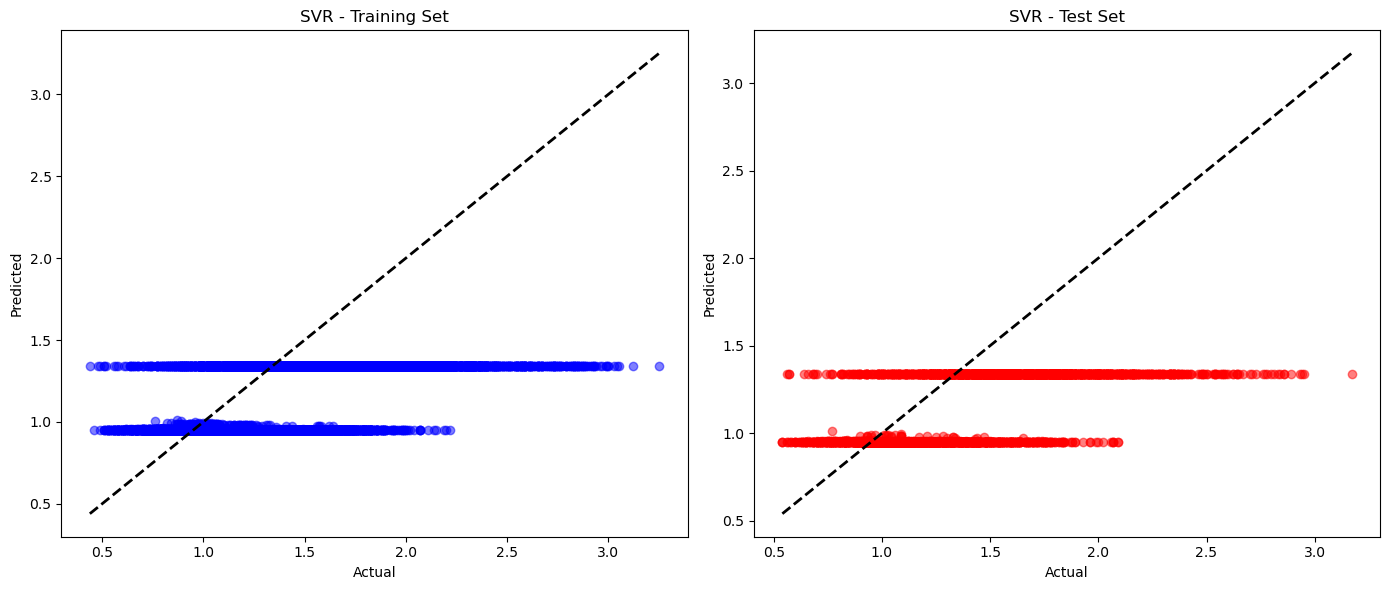

In [251]:
# Visualize SVR results
plt.figure(figsize=(14, 6))

# Training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, pipe_svr.predict(X_train), color='blue', alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVR - Training Set')

# Test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, pipe_svr.predict(X_test), color='red', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVR - Test Set')

plt.tight_layout()
plt.show()

### DecisionTreeRegressor

In [252]:
# Model Prediction
y_pred_train_dt = pipe_dt.predict(X_train)
y_pred_test_dt = pipe_dt.predict(X_test)

In [324]:
# Evaluate the DecisionTreeRegressor model
print("DecisionTreeRegressor Model Evaluation - Train Set")
print(f"R2 Score: {r2_score(y_train, y_pred_train_dt)}")

print("DecisionTreeRegressor Model Evaluation - Test Set")
print(f"R2 Score: {r2_score(y_test, y_pred_test_dt)}")

DecisionTreeRegressor Model Evaluation - Train Set
R2 Score: 0.4203640705312214
DecisionTreeRegressor Model Evaluation - Test Set
R2 Score: 0.4003126828709419


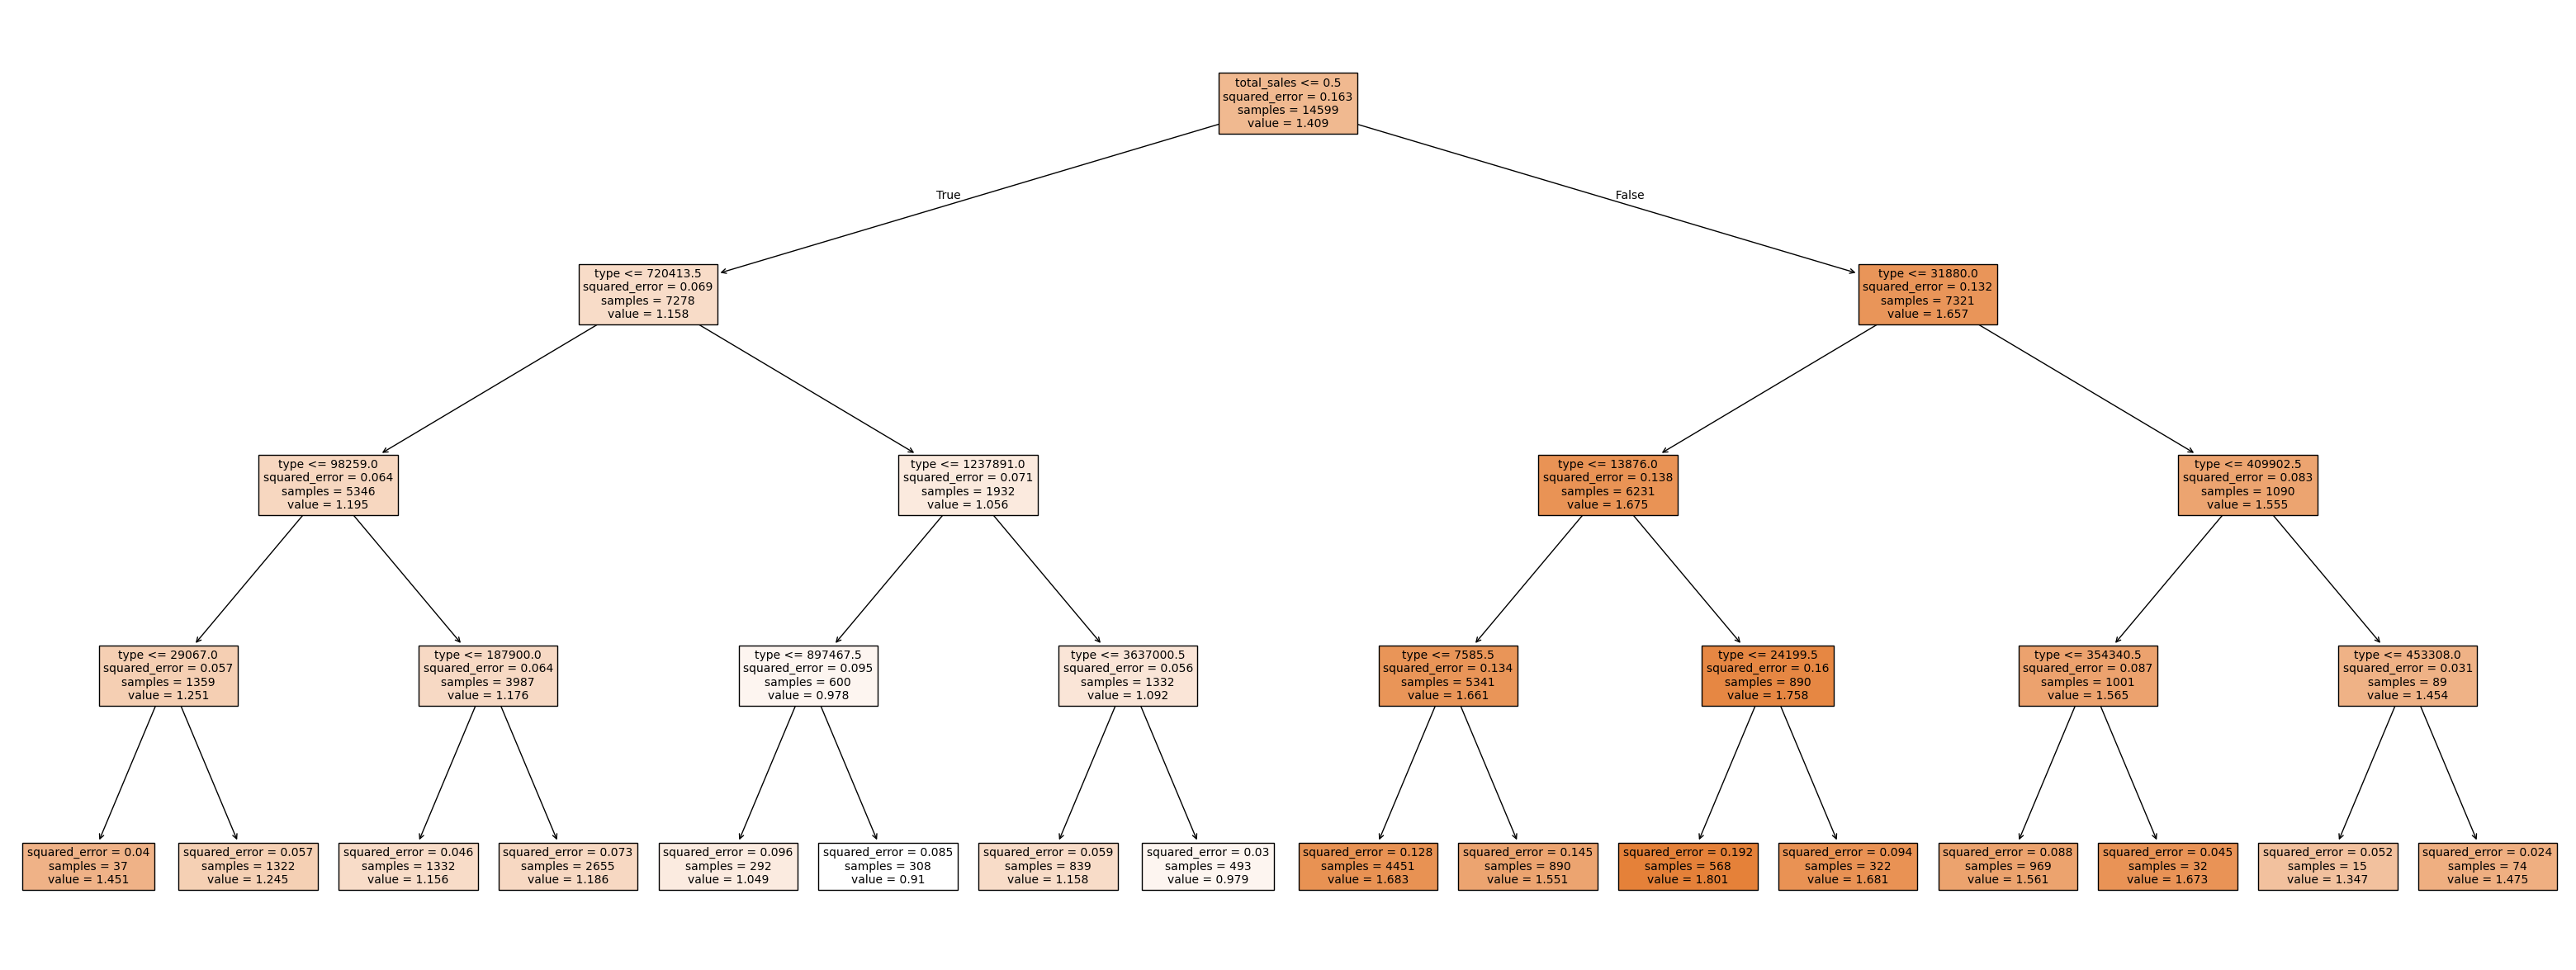

In [273]:
plt.figure(figsize=(40,15))
X.columns = X_train.columns
decision_tree = pipe_dt.named_steps['classifier']
tree.plot_tree(decision_tree, feature_names=X.columns, filled=True, fontsize= 10)
plt.show()

### RandomForestRegressor

In [256]:
# Model Prediction
y_pred_train_rf = pipe_rf.predict(X_train)
y_pred_test_rf = pipe_rf.predict(X_test)

In [326]:
# Evaluate the RandomForestRegressor model
print("RandomForestRegressor Model Evaluation - Train Set")
print(f"R2 Score: {r2_score(y_train, y_pred_train_rf)}")

print("RandomForestRegressor Model Evaluation - Test Set")
print(f"R2 Score: {r2_score(y_test, y_pred_test_rf)}")

RandomForestRegressor Model Evaluation - Train Set
R2 Score: 0.4230655946129913
RandomForestRegressor Model Evaluation - Test Set
R2 Score: 0.40272660809133565


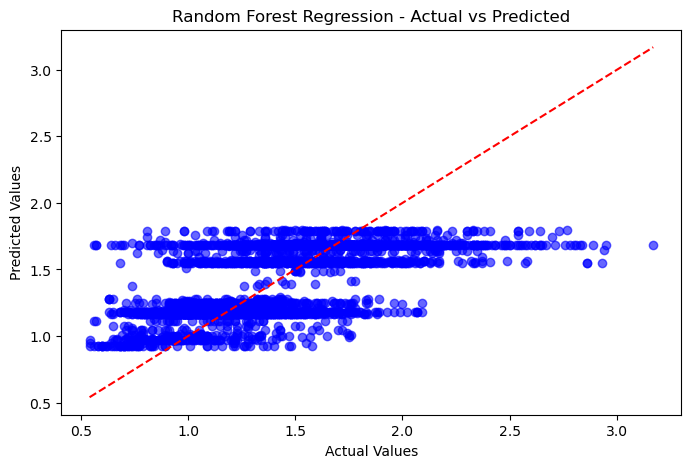

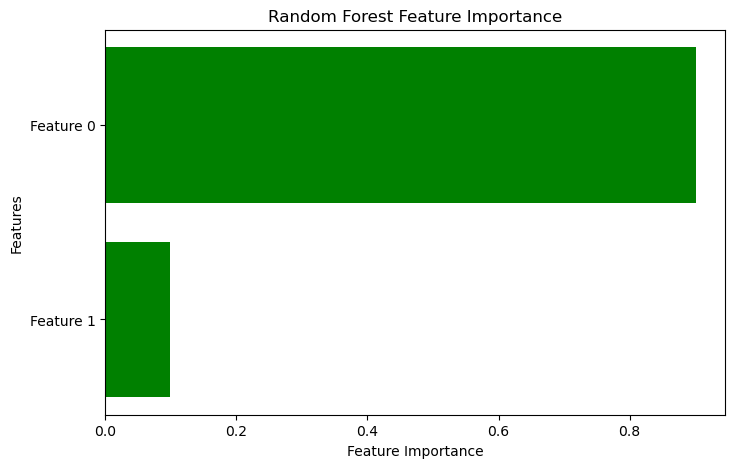

In [258]:
# Scatter plot
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_test_rf, color="blue", alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # Ideal predictions
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression - Actual vs Predicted")
plt.show()

# Get feature importances
feature_importances = rnd_reg.feature_importances_

# Convert to DataFrame
feature_names = ["Feature " + str(i) for i in range(X.shape[1])]
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(8,5))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="green")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.show()

Hasil dari grafik Feature Importance pada model Random Forest Regressor menunjukan Feature 0 lebih penting daripada Feature 1.

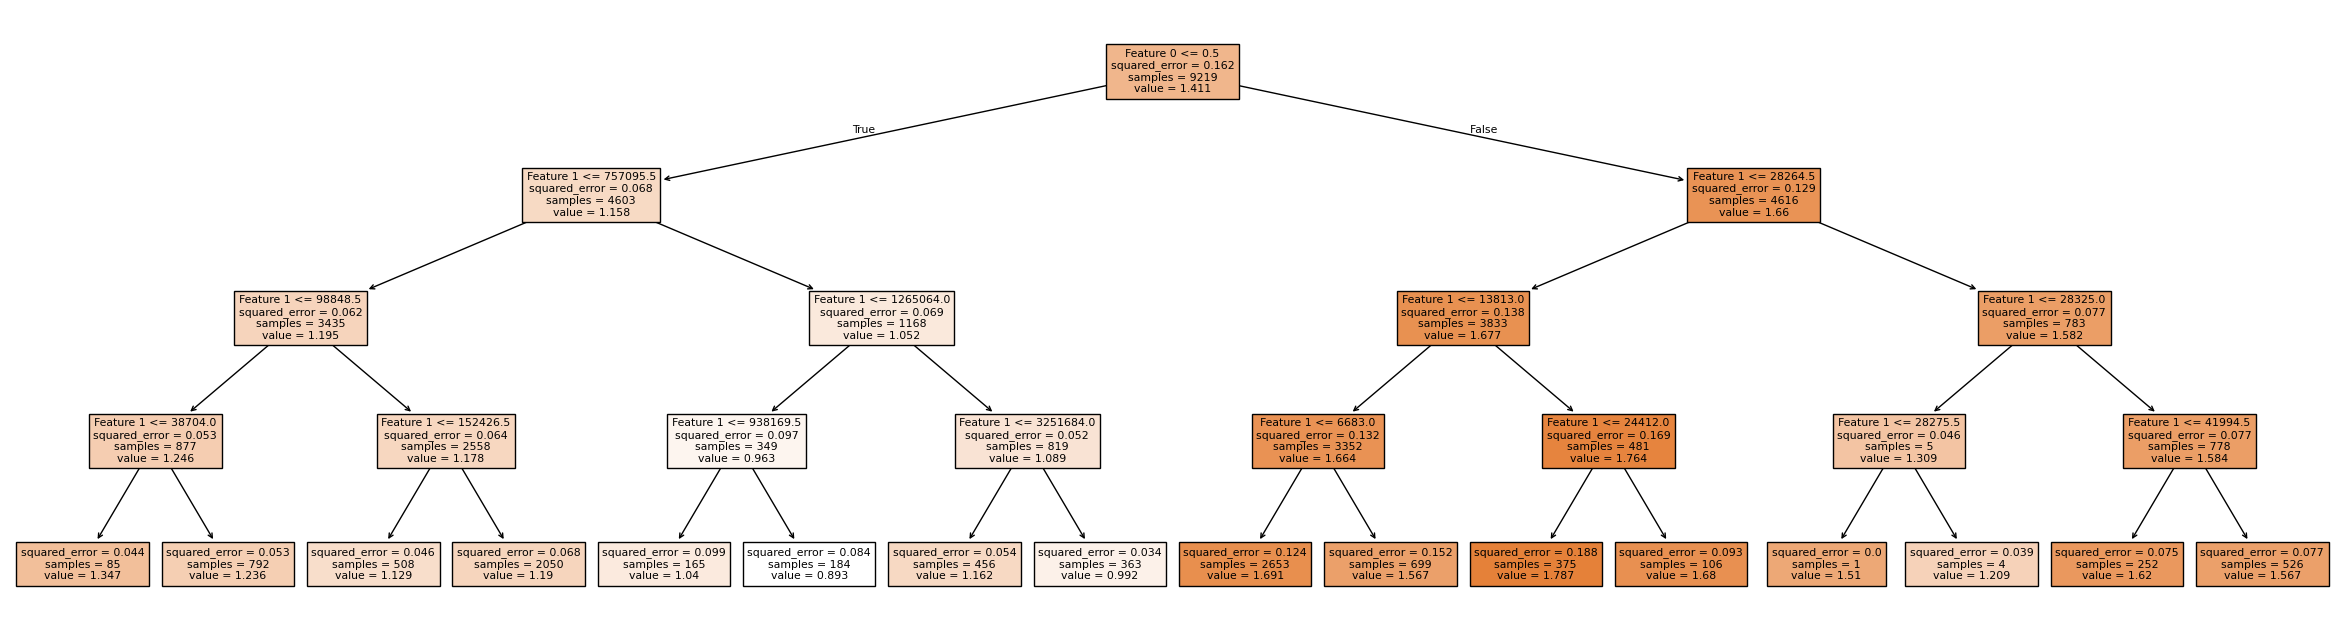

In [259]:
# Select a single tree
single_tree = rnd_reg.estimators_[0]

# Plot
plt.figure(figsize=(30,8))
tree.plot_tree(single_tree, filled=True, feature_names=feature_names)
plt.show()


### GradientBoostingRegressor

In [260]:
# Model Prediction
y_pred_train_boost = pipe_grad.predict(X_train)
y_pred_test_boost = pipe_grad.predict(X_test)

In [327]:
# Evaluate the GradientBoostingRegressor model
print("GradientBoostingRegressor Model Evaluation - Train Set")
print(f"R2 Score: {r2_score(y_train, y_pred_train_boost)}")

print("GradientBoostingRegressor Model Evaluation - Test Set")
print(f"R2 Score: {r2_score(y_test, y_pred_test_boost)}")

GradientBoostingRegressor Model Evaluation - Train Set
R2 Score: 0.3713625779799459
GradientBoostingRegressor Model Evaluation - Test Set
R2 Score: 0.36146654078626805


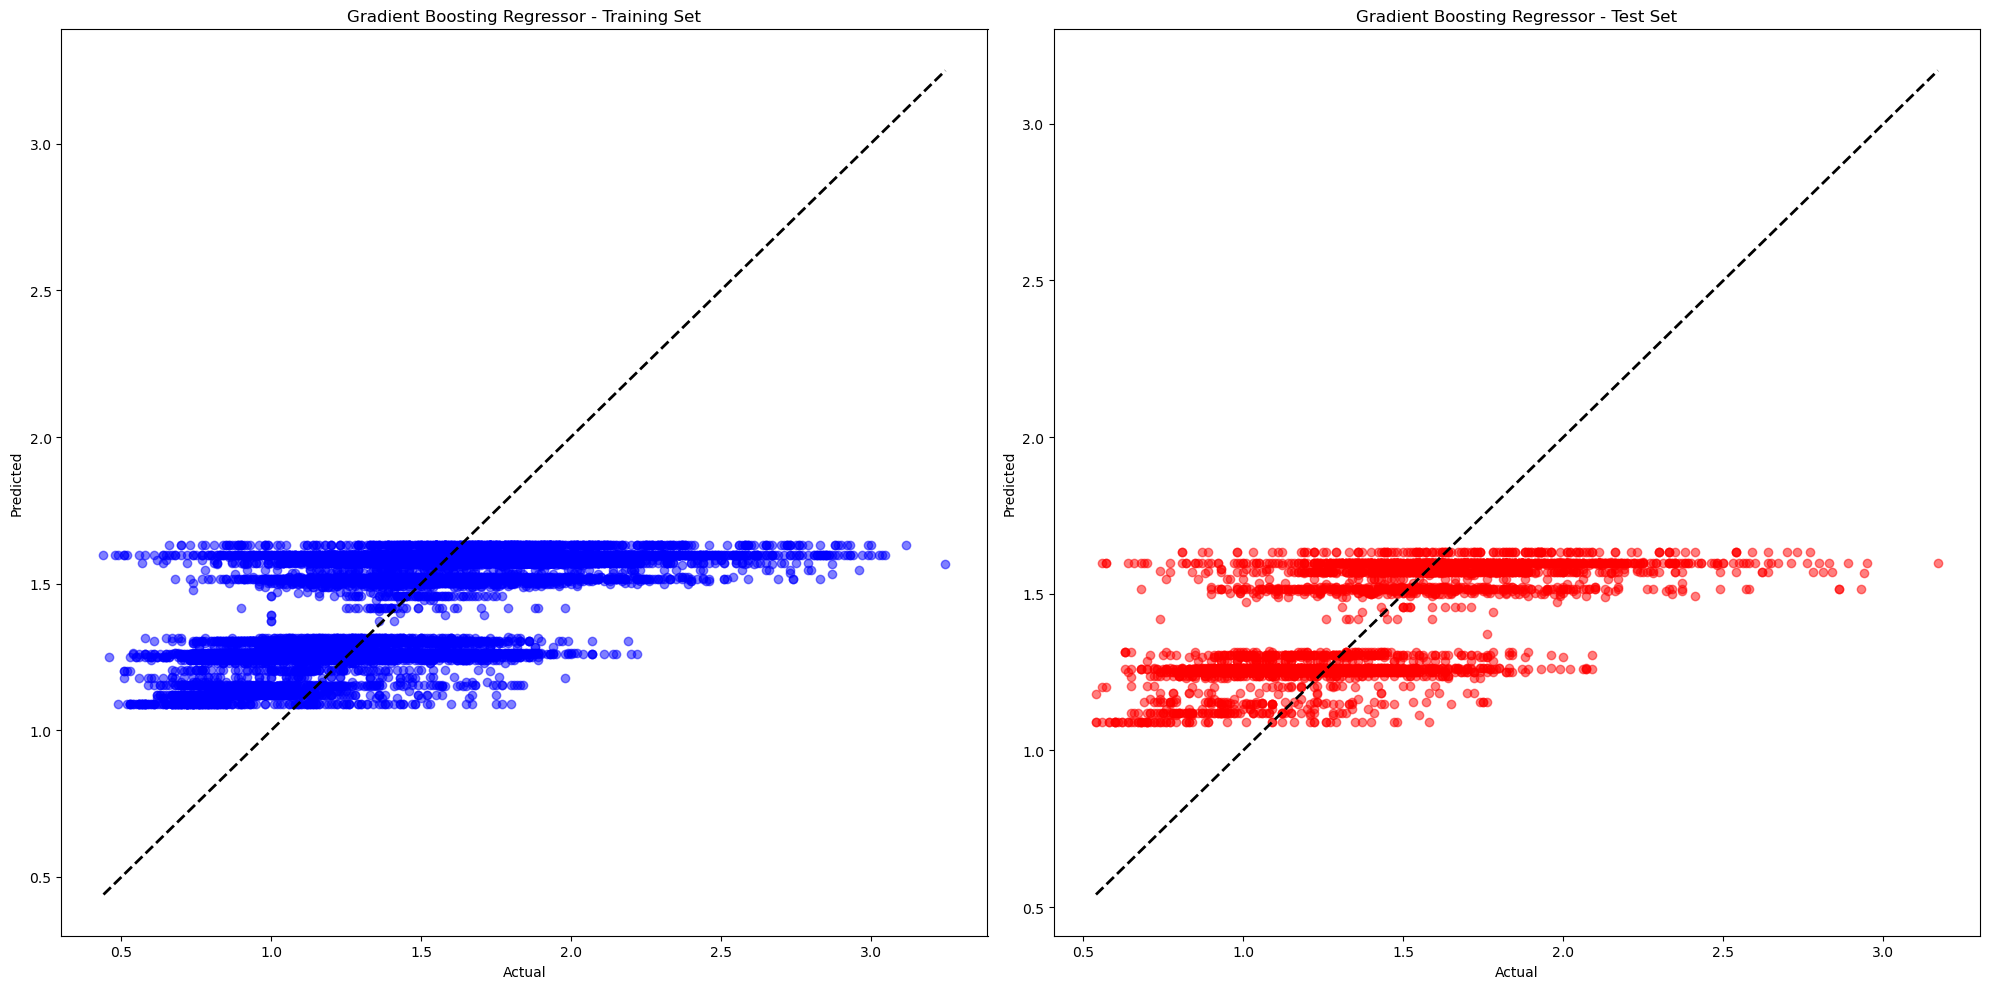

In [262]:
# Visualize Gradient Boosting Regressor results
plt.figure(figsize=(20, 10))

# Training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, pipe_grad.predict(X_train), color='blue', alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boosting Regressor - Training Set')

# Test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, pipe_grad.predict(X_test), color='red', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boosting Regressor - Test Set')

plt.tight_layout()
plt.show()

### Cross Validation

                                                                   R2 Scores  \
KNeighborsRegressor        [0.2251324863583507, 0.18709371143081222, 0.24...   
DecisionTreeRegressor      [0.4182297622694259, 0.4063307507416761, 0.403...   
RandomForestRegressor      [0.42135082671212365, 0.4089111254316371, 0.40...   
GradientBoostingRegressor  [0.37337109082485864, 0.3646961523994551, 0.35...   
SVR                        [0.28029983904597444, 0.33047276773271617, -0....   

                            Mean R2    Std R2  
KNeighborsRegressor        0.233123  0.027151  
DecisionTreeRegressor      0.413224  0.008659  
RandomForestRegressor      0.416455  0.007573  
GradientBoostingRegressor  0.366358  0.006659  
SVR                       -0.076156  0.422455  


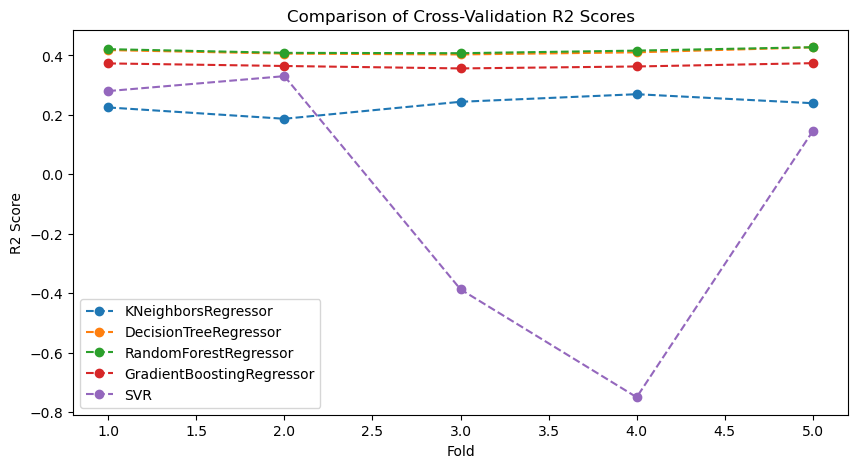

In [306]:
# Definisikan model-model yang akan dibandingkan
models = {
    'KNeighborsRegressor': pipe_knn,
    'DecisionTreeRegressor': pipe_dt,
    'RandomForestRegressor': pipe_rf,
    'GradientBoostingRegressor': pipe_grad,
    'SVR' : pipe_svr
}

# Simpan hasil cross-validation dalam sebuah dictionary
cv_results = {}

for model_name, model in models.items():
    r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    cv_results[model_name] = {
        'R2 Scores': r2_scores,
        'Mean R2': r2_scores.mean(),
        'Std R2': r2_scores.std()
    }

# Konversi dictionary menjadi DataFrame
cv_results_df = pd.DataFrame(cv_results).T

# Tampilkan hasil cross-validation
print(cv_results_df)

# Visualisasi hasil cross-validation
plt.figure(figsize=(10, 5))
plt.title('Comparison of Cross-Validation R2 Scores')
for model_name in cv_results:
    plt.plot(range(1, 6), cv_results[model_name]['R2 Scores'], marker='o', linestyle='--', label=model_name)
plt.xlabel('Fold')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

Berdasarkan hasil cross-validation, model Random Forest Regressor menunjukkan performa terbaik dengan nilai R2 yang tinggi dan konsisten dibandingkan dengan model lain.

### Hyperparameter Tuning

Berdasarkan dari hasil cross-validation, model Random Forest Regressor dipilih untuk dilakukan hyperparameter tuning.

Untuk Hyperparameter Tuning dipilih menggunakan Random Search, hal ini dikarenakan jika dibandingkan dengan metode Grid Search, metode Random Search memiliki waktu training yang lebih cepat.

#### Hyperparameter Tuning - Training

In [284]:
# Hyperparameter Tuning : Random Search

# Define Hyperparameters
n_estimators = [50, 100, 200]
max_depth = [5, 10, 20]
min_samples_split = [5, 10]
min_samples_leaf = [5, 10]
random_search_params = {
    'classifier__n_estimators': n_estimators,
    'classifier__max_depth': max_depth,
    'classifier__min_samples_split': min_samples_split,
    'classifier__min_samples_leaf': min_samples_leaf
}
random_search_params

{'classifier__n_estimators': [50, 100, 200],
 'classifier__max_depth': [5, 10, 20],
 'classifier__min_samples_split': [5, 10],
 'classifier__min_samples_leaf': [5, 10]}

In [300]:
# Train with Random Search
rnd_reg_randomcv = RandomizedSearchCV(estimator=pipe_rf,
                                 param_distributions=random_search_params,
                                 n_iter=5,
                                 cv=5,
                                 random_state=141,
                                 n_jobs=-1,
                                 scoring='r2')
rnd_reg_randomcv.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('cat',
                                                                               OrdinalEncoder(),
                                                                               ['type'])])),
                                             ('classifier',
                                              RandomForestRegressor(max_depth=4,
                                                                    n_estimators=10,
                                                                    random_state=141))]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'classifier__max_depth': [5, 10, 20],
                                        'classifier__min_samples_leaf': [5, 10],
                                        'classifier__min_samples_split': [5,
                                                                          10],
                                        'classifier__n_estimators': [50, 100,
                                                                     200]},
                   random_state=141, scoring='r2')

In [301]:
# Best hyperparameters for Random Forest Regressor
print('Best hyperparameters for Random Forest Regressor:', rnd_reg_randomcv.best_params_)

# Best R2 for Random Forest Regressor
print('Best R2 for Random Forest Regressor:', rnd_reg_randomcv.best_score_)

# Save best Random Forest Regressor model to a variable
best_rnd_reg_model = rnd_reg_randomcv.best_estimator_

Best hyperparameters for Random Forest Regressor: {'classifier__n_estimators': 200, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 10, 'classifier__max_depth': 5}
Best R2 for Random Forest Regressor: 0.4204115402685133


#### Hyperparameter Tuning - Evaluation

In [302]:
# Get predictions for training and testing set using the hyperparameter tuned model
y_pred_train_tuned = best_rnd_reg_model.predict(X_train)
y_pred_test_tuned = best_rnd_reg_model.predict(X_test)

In [318]:
# Print R2 score Random Forest Regressor
print('Untuned Random Forest Regressor')
print('R2 - Train Set  : ', r2_score(y_train, y_pred_train_rf))
print('R2 - Test Set   : ', r2_score(y_test, y_pred_test_rf))

# Print R2 score Random Forest Regressor Tuned
print('Tuned Random Forest Regressor')
print('R2 - Train Set  : ', r2_score(y_train, y_pred_train_tuned))
print('R2 - Test Set   : ', r2_score(y_test, y_pred_test_tuned))

Untuned Random Forest Regressor
R2 - Train Set  :  0.4230655946129913
R2 - Test Set   :  0.40272660809133565
Tuned Random Forest Regressor
R2 - Train Set  :  0.4309030587877333
R2 - Test Set   :  0.40817934726077665


Hasil dari tuning model Random Forest Regressor menunjukan peningkatan meskipun tidak terlalu signifikan, hal ini mungkin disebabkan karena nilai hyperparameter yang digunakan terlalu kecil. Nilai hyperparameter yang kecil dapat mempersingkat waktu training tetapi memiliki dampak peningkatan performa pada model yang tidak terlalu signifikan, sebaliknya nilai hyperparameter yang besar akan menyebabkan waktu training yang lama tetapi ada kemungkinan dapat meningkatkan performa model secara signifikan.

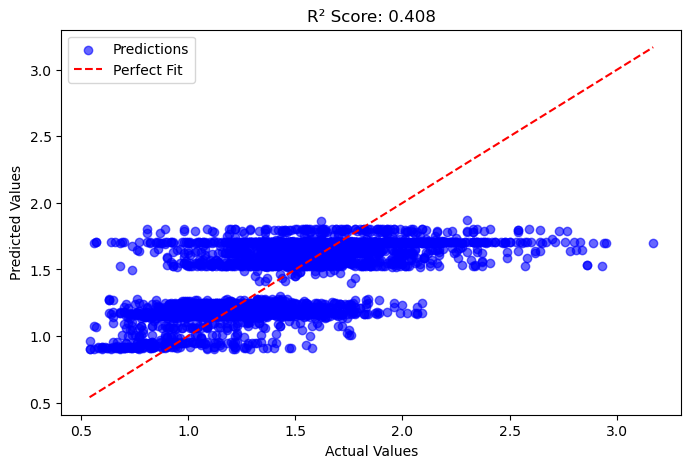

In [289]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_test_tuned, color="blue", alpha=0.6, label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Fit")  # Ideal prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"R² Score: {r2_score(y_test, y_pred_test_tuned):.3f}")
plt.legend()
plt.show()

## Model Saving

In [ ]:
# Save Model
with open('best_rnd_reg_model.pkl', 'wb') as model_file:
    pickle.dump(best_rnd_reg_model, model_file)

## Model Inference

Dibuat pada notebook berbeda dengan nama file P1M2_eldi_inf.ipynb

## Kesimpulan

Dataset ini berisi mengenai data penjualan buah alpukat di Amerika Serikat selama 2015 - 2018. Buah alpukat yang dipilih pada dataset ini adalah buah alpukat dengan cultivar HASS (***Persea americana .var Hass***), hal ini ditandai dengan kode adanya PLU. Kode PLU 4046, PLU 4225, dan PLU 4770 hanya diberikan kepada buah alpukat dengan cultivar HASS. Tidak ditemukan adanya missing value pada dataset ini, tetapi dataset ini memiliki outlier. Outlier pada dataset ini tidak dihandle karena outlier pada dataset seperti ini dianggap normal. Sayangnya nilai didalam kolom Total Volume memiliki kejanggalan, kolom Total Volume berisi hasil dari penjumlahan dari kolom 4046, 4225 dan kolom 4770, ketika kolom-kolom ini dijumlah hasilnya tidak seuai dengan nilai yang terdapat pada kolom Total Volume. Dikarenakan ketidak cocokan nilai ini maka dilakukan penghitungan ulang dan dimasukan kedalam kolom baru dengan nama kolom total_sales. Kolom Total Volume selanjutnya di drop.Selanjutnya dilakukan pengecekan distribusi data menggunakan Histogram, Uji Skew dan Uji Shapiro-Wilk. Ditemukan semua kolom numerical bersifat skewed. Lalu dilakukan uji Phik Correlation untuk menemukan kolom mana yang memiliki korelasi yang kuat dengan kolom target, yaitu kolom AveragePrice. Dari hasil phik correlation ditemukan bahwa `total_sales`, `4046`, `4225`, `4770`, `Total Bags`, `Small Bags`, `Large Bags`, `XLarge Bags` dan `year` memiliki korelasi positif yang lemah dengan `AveragePrice`. Sedangkan `Date`, dan `region` memiliki korelasi positif yang cukup kuat dengan `AveragePrice`. Selanjutnya, `type` memiliki korelasi yang kuat dengan `AveragePrice`. Dari hasil phik correlation dipilih fitur `total_sales` dan `type`.

Setelah melakukan EDA dan Feature Engineering, dilanjutkan dengan melakukan Model Definition. Dipilih model KNeighborRegressor, SVR, DecisionTreeRegressor, RandomForestRegressor, dan GradientBoostingRegressor. Model-model ini dipilih karena objektif dari proyek ini bersifat Regression karena mencari prediksi dari sebuah nilai yaitu harga. Lalu dilakukan Model Training menggunakan pipeline, setelah itu dilakukan Model Evaluation menggunakan Cross Validation dengan metrik R2 score.

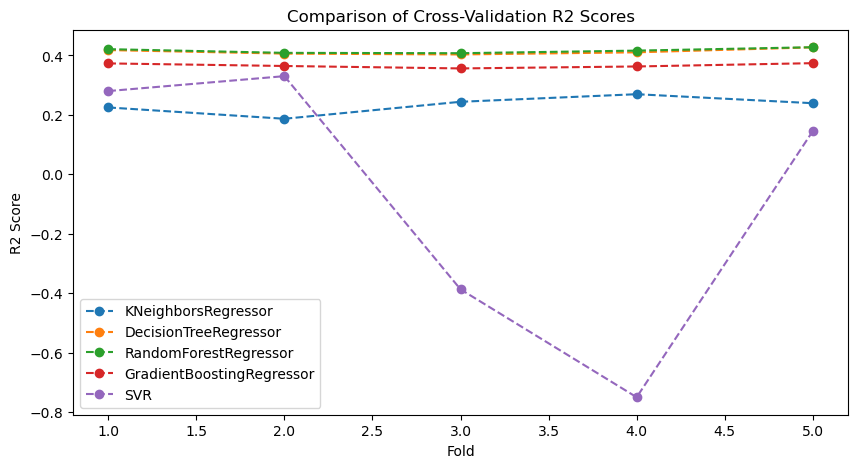

Dari hasil Cross Validation, model SVR dapat dikatakan cukup tidak konsisten jika dibandingkan dengan model lainnya. Model SVR memiliki nilai R2 scode yang cukup tinggi pada fold ke-1 dan ke-2, hanya saja nilai R2 scorenya menurun drastis pada fold ke-3 dan ke-4, dan naik kembali pada fold ke-5. Model-model lain memiliki nilai R2 score yang cukup konsisten. Model RandomForestRegressor dan model DecisionTreeRegressor memiliki nilai R2 score tertinggi dibandingkan dengan model-model lainnya. Model RandomForestRegressor memiliki nilai R2 score yang sedikit lebih tinggi dibandingkan dengan model DecisionTreeRegressor, sehingga pada grafik kedua model ini tampak seperti tumpang tindih. Model RandomForestRegressor dipilih untuk dilakukan Hyperparameter Tuning karena memiliki nilai R2 score yang tertinggi dibandingkan dengan model lainnya.

Setelah dilakukan Hyperparameter Tuning, selanjutnya dilakukan evaluasi terhadap model. Model RandomForestRegressor yang telah di tuning kemudian dibandingkan dengan model RandomForestRegressor yang belum dituning. Ditemukan adanya peningkatan performa pada model RandomForestRegressor yang telah di tuning. Hasil dari tuning model RandomForestRegressor menunjukan peningkatan meskipun tidak terlalu signifikan, hal ini mungkin disebabkan karena nilai hyperparameter yang digunakan terlalu kecil. Nilai hyperparameter yang kecil dapat mempersingkat waktu training tetapi memiliki dampak peningkatan performa pada model yang tidak terlalu signifikan, sebaliknya nilai hyperparameter yang besar akan menyebabkan waktu training yang lama tetapi ada kemungkinan dapat meningkatkan performa model secara signifikan. Model RandomForestRegressor yang telah dituning kemudian di save dan dilakukan pengetesan pada Model Inference.

Dari hasil Model Inference ditemukan bahwa buah alpukat organik memiliki nilai jual yang lebih tinggi dibandingkan dengan buah alpukat konvensional. Hal ini mengkonfirmasi asumsi bahwa alpukat organik memiliki nilai jual yang lebih tinggi dibandingkan dengan alpukat konvensional. Pada bagian Feature Importance, Feature 0 memiliki dampak yang lebih signifikan pada harga jual buah alpukat dibandingkan dengan Feature 1. Dapat ditarik kesimpulan bahwa Feature 0 adalah kolom fitur type dan Feature 1 adalah kolom fitur total_sales. 

Model ini dapat memprediksi harga jual alpukat dengan cukup baik, hanya saja model ini dapat ditingkatkan lagi performanya. Dalam menentukan harga jual buah alpukat selain jenis buah alpukat organik ataupun konvensional, ukuran, tingkat kematangan dan varietas dari buah alpukat tersebut juga dapat mempengaruhi harga jual buah alpukat. Rekomendasi untuk meningkatkan model ini adalah menggunakan dataset yang memiliki data yang lebih lengkap lagi seperti data ukuran buah alpukat, varietas dari buah alpukat dll. Selain itu untuk meningkatkan akurasi dan konsistensi dari prediksi model ini, dapat menggunakan nilai hyperparameter yang lebih besar dibandingkan dengan nilai hyperparameter yang digunakan pada proyek ini.

### Conceptual Problems

1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !  

Bagging (Boorstrap Aggregating) dikembangkan untuk mengurangi varians dan mencegah overfitting, contohnya adalah model Decision Tree, model Decision Tree memiliki kecenderungan untuk overfitting. Bagging bekerja dengan membuat beberapa subset data menggunakan bootstrap sampling. Subset ini selanjutnya digunakan untuk training model secara independen dan paralel. Hasil akhir yang didapat dapat berupa rata-rata (regresi) atau voting (klasifikasi). Contoh model dari bagging adalah Random Forest.

2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang anda pilih !  

Model Random Forest bekerja dengan cara mengurangi varians dengan menggabungkan prediksi dari banyak pohon keputusan yang ditrain secara independen pada subset data yang berbeda, sedangkan model Boosting (Gradient Boosting Regressor) bekerja dengan cara mengurangi bias dengan membangun model secara berurutan, di mana setiap model baru mencoba untuk memperbaiki kesalahan dari model sebelumnya..

3. Jelaskan apa yang dimaksud dengan Cross Validation !  

Cross-validation adalah teknik yang digunakan untuk mengevaluasi performa model machine learning dengan cara membagi data menjadi beberapa subset atau "folds". Tujuan utama dari cross-validation adalah untuk memastikan bahwa model yang dilatih tidak overfitting atau underfitting, dan untuk memberikan estimasi yang lebih akurat tentang bagaimana model akan bekerja pada data yang tidak terlihat (data baru).